In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from sklearn.linear_model import LinearRegression
from statistics import mean
from tqdm import tqdm_notebook

In [2]:
def generateAngleMinimum(angleNumber, beamWidth):
    angles = np.array([])
    lowerBound = -beamWidth / 2
    upperBound = beamWidth
    for i in np.arange(1, angleNumber + 1):
        angleToAdd = random.uniform(lowerBound, upperBound)
        if i % 2 == 0:
            angles = np.append(angles, angleToAdd)
        else:
            angles = np.append(angles, angleToAdd + 180)
    return angles


def angularValue(angleArray):
    sumOfCos = 0
    index = 1
    for i in angleArray:
        for j in angleArray[index:]:
            sumOfCos += np.cos(np.deg2rad(i - j))
        index += 1
    return sumOfCos


def generateChannelCoefficient(pathNumber, pathCoefficient, angleArray):
    channelCoeff = np.square(pathCoefficient) * (
        pathNumber + (2 * angularValue(angleArray)))
    return channelCoeff

In [3]:
beamWidth = 5
iteration = 1
pathCoefficient = 1
pathNumber = 1000
pathStart = 50
pathSpacing = 50
currentIteration = []
channelCoefficientIterations = []
channelCoefficientAverage = []

In [4]:
print('Starting iterations!\nPath number: {}\nIteration: {}\nBeam width: {}'.
      format(pathNumber, iteration, beamWidth))

for path in tqdm_notebook(np.arange(pathStart, pathNumber + 1, pathSpacing)):
    currentIteration = []
    for itr in np.arange(iteration):
        angles = generateAngleMinimum(path, beamWidth)
        channelCoefficient = generateChannelCoefficient(
            path, pathCoefficient, angles)
        currentIteration.append(channelCoefficient)
    channelCoefficientIterations.append(currentIteration)
    channelCoefficientAverage.append(mean(currentIteration))

Starting iterations!
Path number: 1000
Iteration: 1
Beam width: 5


NameError: name 'random' is not defined

In [17]:
channelCoefficientAverage

[1,
 3.9624913630076364e-05,
 1.0019535606997816,
 0.027872715317297736,
 1.0000278919498626,
 0.010730354863426328,
 0.9994672087728853,
 0.0008056882499971607,
 1.000670497918354,
 0.004214933055800785,
 1.0147561369799547,
 0.013333221043101418,
 0.9983216952465668,
 0.01085004096371378,
 1.0082314743445675,
 0.0022840970555435547,
 1.0484237468089557,
 0.004244864688129013,
 0.994743500916563,
 0.00034417800479857874,
 1.0219773709878446,
 0.02811782075434266,
 1.016616684971197,
 0.014243537336835033,
 1.0436568858112913,
 0.004469976330611303,
 1.094293695552686,
 0.029417382636196976,
 0.996945427908944,
 0.005636059564910312,
 1.0197758905238246,
 0.15039493417713956,
 1.0257665048362554,
 0.07431064213453453,
 1.0349010460548698,
 0.008504243064585637,
 1.1733043046431035,
 0.05336682822411376,
 1.0084965529214571,
 0.0003652632048769533,
 1.0743792871911566,
 0.005550017497448323,
 1.0039815350855434,
 0.3040095488370511,
 0.9991091320691439,
 0.010193264605597108,
 1.0551982

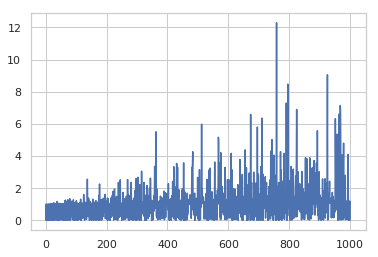

In [20]:
plt.plot(range(1, len(channelCoefficientAverage)+1), channelCoefficientAverage)